Entrega: La entrega de este examen se realizará a traves del git hub, en directorio https://github.com/hernansalinas/Metodos_Computacionales_taller/tree/main/Quiz/Entregas

El nombre del notebook deberá ser:

Apellido_Nombre_UltimosCuatroDigitosDelDocumento.ipynb

# Paracaidista en un atmosfera no uniforme.

En una atmósfera isotérmica, la variación de la presión en función de la altitud está dada por la ley de Laplace.

\begin{equation}
P=P_0 e^{-\frac{Mgy}{kT}}
\end{equation}


- $P_0=1atm$ es la presión de la atmósfera a nivel del mar
- M es el peso molecular del aire $28.8 g/mol=0.0288 kg/mol$
- g es la aceleración de la gravedad
- $k=1.3805·10^{-23}$ J/K es la constante de Boltzmann
- $T$ es la temperatura de la atmósfera en kelvin
- $NA=6.0225\times 10^23$ es el número de Avogadro, número de moléculas que caben en un mol.

Suponiendo que el aire se comporta como un gas ideal, su densidad varía con la altura de la misma forma que la presión, $\rho=\rho_0 exp(-y/\lambda)$. La densidad del aire al nivel del mar es $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$


Las fuerzas que actuan sobre el paracaidista son:  El peso y la fuerza de fricción $f=\frac{1}{2}\rho A \delta v^2$, donde $\rho$ es la densidad que depende de la altura, A es el area de seccion trasnversal expuesta al aire  y $\delta $ es coeficiente de rozamiento. La Ecuacion diferencial de movimiento viene dada por:

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = -g + \frac{A\delta}{2m} \rho v^2 
\end{equation}


\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g +\frac {k_0}{m} v^2 exp(-y/\lambda)
\end{equation}

donde $k_0=\frac{\rho_0A\delta}{2}$, siendo $\rho_0$ la densidad al nivel del mar.

Para la situación descrita, su tarea será elaborar un notebook de jupyter para resolver lo siguente:

1.  Elaborar una gráfica de la densidad como función de la altura.
2. Diseñar un programa que resuelva  la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros: 

- $m=60kg$, $A=0.3m^2$, $h=30km$.
- $m=60kg$, $A=0.3m^2$, $h=40km$.
- $m=60kg$, $A=0.3m^2$, $h=50km$.
- $m=60kg$, $A=0.3m^2$, $h=60km$.
- $m=60kg$, $A=0.3m^2$, $h=70km$.

3. Con la solucion de la ecuacion diferencial, elaborar una gráfica de. 
- la posición como función del tiempo.
- La velocidad como función del tiempo.
- La velocidad como función de la posición 

4. Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:

http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html



5. Realice un grafico de la velocidad maxima como función de la altura de caida.



Reto:

El modelo puede ser mejorado si se tiene presente que la aceleración de la gravedad varia según la altura.

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - \frac{GM}{(R+y)^2} + \frac{A\delta}{2m} \rho v^2 
\end{equation}

donde $G=6.67\times 10^{-11} \mathrm{Nm^2/kg}$, $M=5.98\times 10 ^{24} \mathrm{kg}$ y el radio de la Tierra es de $R=6.371\mathrm{km}$


Solucione la ecuación diferencial para este caso.





In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint
import pandas as pd
import scipy.optimize as optimize
import scipy as sp
from scipy import interpolate

In [2]:
def fun(y):                             #densidad en funcion de la altura
 d = 1.29*np.exp(-y/7482.2)
 return d

In [3]:
y = np.linspace(30000,70000,10000)      #linspace de la altura para tener mas puntos
D = []                                  # datos de la densidad en funcion de los puntos anteriores de la altura
for i in range(0,len(y)):           
  D.append(fun(y[i]))

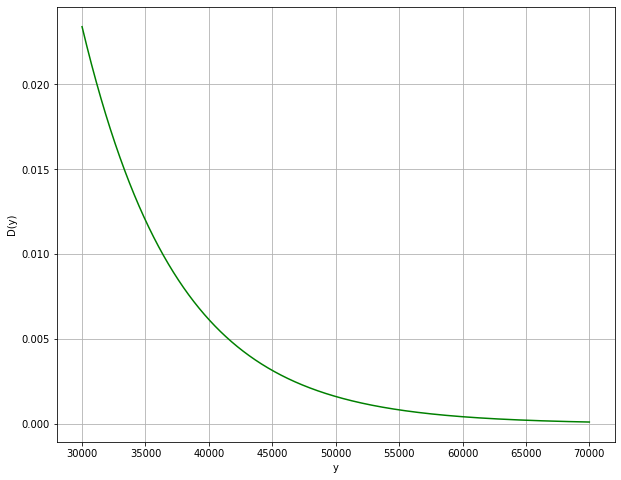

In [4]:
fig1 = plt.figure(figsize = (10,8))     #grafica densidad en funcion de la altura 
plt.plot(y, D,color = "green")
plt.xlabel("y")                         #nombre del eje x
plt.ylabel("D(y)")                      #nombre del eje y
plt.grid()

In [5]:
def f(y,t,params):                         #Ecuacion diferencial de movimiento del paracaidista
  ko = params[0]
  g = params [1]
  λ = params [2]

  dydt = y[1]
  dvdt = -g + ko*(y[1]**2)*np.exp(-y[0]/λ)  
  
  return[dydt,dvdt]



In [6]:
G = 9.8                                   #parametros
KO = (1.29*0.3*0.8)/(2*60)
L = 7482.2
params = [KO,G,L]

t = np.linspace(0,250,100000)             #tiempo 

In [7]:
y_0 = [30000,40000,50000,60000,70000]     #datos iniciales de la altura
v_0 = 0                                   #Velocidad inicial
sol = []                                  #arreglo de listas con las soluciones posicion y velocidad


for i in range(0,len(y_0)):               #for para agregar las listas de soluciones variando la altura
  y = [y_0[i],0]
  sol.append(odeint(f,y,t,args=(params,)))  



In [8]:
Y1 = sol[0][:,0]                         #velocidades y alturas para cada condicion inicial
V1 = sol[0][:,1]

Y2 = sol[1][:,0]
V2 = sol[1][:,1]

Y3 = sol[2][:,0]
V3 = sol[2][:,1]

Y4 = sol[3][:,0]
V4 = sol[3][:,1]

Y5 = sol[4][:,0]
V5 = sol[4][:,1]


ys = [Y1,Y2,Y3,Y4,Y5]
vs = [V1,V2,V3,V4,V5]

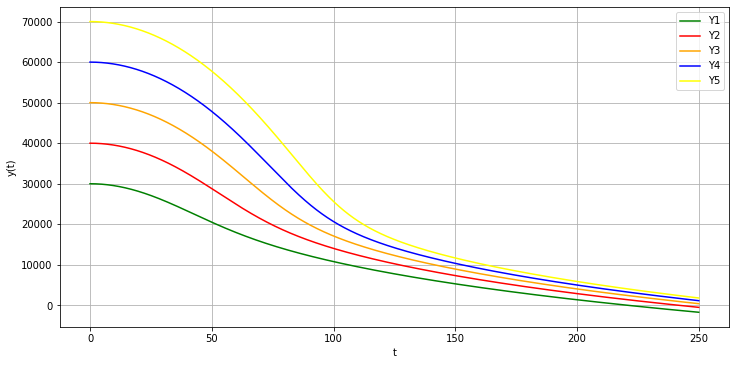

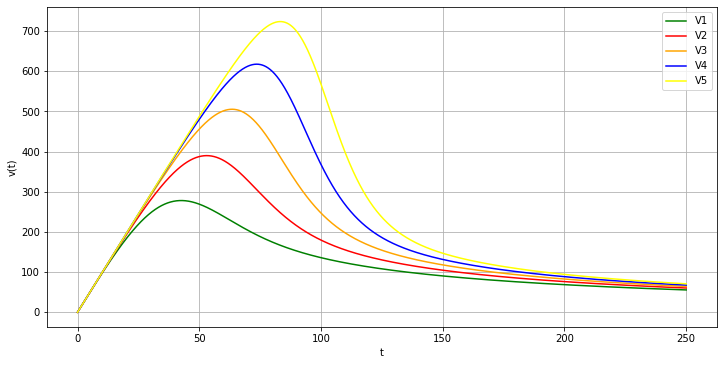

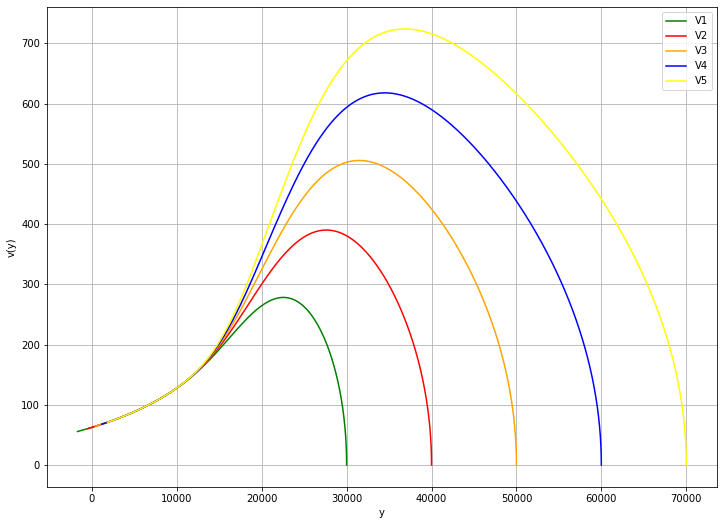

In [9]:
fig1 = plt.figure(figsize=(12,20))                       # grafica de posiciones en funcion del tiempo
plt.subplot(311)
plt.plot(t, Y1,color="green", linestyle="-", label="Y1") 
plt.plot(t,Y2,color="red" ,linestyle="-", label="Y2") 
plt.plot(t,Y3,color="orange",linestyle="-", label="Y3") 
plt.plot(t,Y4,color="blue",linestyle="-", label="Y4") 
plt.plot(t,Y5,color="yellow",linestyle="-", label="Y5") 
plt.legend()
plt.xlabel("t")    #nombre del eje x
plt.ylabel("y(t)") #nombre del eje y
plt.grid()


fig2 = plt.figure(figsize=(12,20))                        # grafica de velcidades en funcion del tiempo
plt.subplot(312)
plt.plot(t, -V1,color="green", linestyle="-", label="V1") 
plt.plot(t,-V2,color="red", linestyle="-", label="V2") 
plt.plot(t,-V3,color="orange", linestyle="-", label="V3") 
plt.plot(t,-V4,color="blue", linestyle="-", label="V4") 
plt.plot(t,-V5,color="yellow", linestyle="-", label="V5")
plt.legend()
plt.xlabel("t")    #nombre del eje x
plt.ylabel("v(t)") #nombre del eje y
plt.grid()


fig3=plt.figure(figsize=(12,30))                           # grafica de velocidades en funcion de la posiciones
plt.subplot(313)
plt.plot(Y1, -V1,color="green", linestyle="-", label="V1") 
plt.plot(Y2,-V2,color="red", linestyle="-", label="V2") 
plt.plot(Y3,-V3,color="orange", linestyle="-", label="V3") 
plt.plot(Y4,-V4,color="blue", linestyle="-", label="V4") 
plt.plot(Y5,-V5,color="yellow", linestyle="-", label="V5")
plt.legend()
plt.xlabel("y")    #nombre del eje x
plt.ylabel("v(y)") #nombre del eje y
plt.grid()

In [10]:
#velocidad maxima analizado numericamente
P = []                                                   #lista para polinomios
altura = []                                              #lista donde se guardan las alturas donde se alcanza la velocidad maxima
Vmax = []                                                # velocidades maximas

for i in range(0,len(ys)):                               #recorre las tuplas de ys y vs para crear los polinomios
  p = interpolate.interp1d(ys[i],vs[i])                  
  P.append(p)                                            #se agrega cada polinomio a la lista de polinomios P
  minimo = optimize.fminbound(p,0,y_0[i])                #se halla el minimo de la alura la cual debe estar entre 0 y la condicion de altura
  altura.append( minimo)                                 #inicial respectiva
  maximo = abs(p(minimo))                                #se evalua cada polinomio en su respectivo minimo y se hace con valor absoluto ya que las alturas
  Vmax.append(maximo)                                    #están negativas 
  

df = pd.DataFrame()                                     #visualizacion de los resultados: las velocidades maximas alcanzadas en cada altura
df["altura"] = altura
df["vmax"] = Vmax
df

,altura,vmax
0,22551.708373,278.164010
1,27608.872503,390.008119
2,31490.185155,505.472418
3,34491.486538,617.714100
4,36861.850726,723.799567


In [11]:
G = 9.8                                                    #parametros
KO = (1.29*0.3*0.8)/2
L = 7482.2
params = [KO,G,L]                  

vl = np.sqrt(60*params[1]/params[0])                       #velocidad limite
VM = []                                                    #lista donde se guardan las velocidades maximas

for i in range(0,len(Vmax)):                               #recorre la ecuacion cambiando las alturas maximas antes obtenidas para 
  vm = np.sqrt(vl**2/np.exp(-altura[i]/params[2]))         #hallar la velocidad maxima analiticamente
  VM.append(vm)
   

In [12]:
df = pd.DataFrame()                                        #visualizacion de los resultados: las velocidades maximas alcanzadas en cada altura
df["altura"] = altura
df["vmax"] = VM
df

,altura,vmax
0,22551.708373,278.160428
1,27608.872503,389.999073
2,31490.185155,505.482849
3,34491.486538,617.745692
4,36861.850726,723.772479


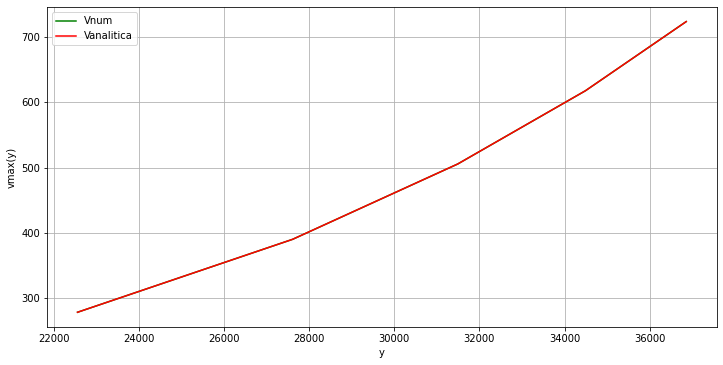

In [13]:
fig1 = plt.figure(figsize=(12,20))                                               # grafica de posiciones en funcion del tiempo
plt.subplot(311)
plt.plot(altura, Vmax,color="green", linestyle="-", label="Vnum") 
plt.plot(altura,VM,color="red" ,linestyle="-", label="Vanalitica")  
plt.legend()
plt.xlabel("y")    #nombre del eje x
plt.ylabel("vmax(y)") #nombre del eje y
plt.grid()

Reto

In [14]:
def f2(y,t,params):                                     #Ecuacion diferencial de movimiento del paracaidista
  ko = params[0]
  GM = params[1]
  λ = params[2]
  R = params[3]

  dydt= y[1]
  dvdt= -GM/(R+y[0])**2 + ko*(y[1]**2)*np.exp(-y[0]/λ)  
  
  return[dydt,dvdt]

In [15]:
GM =6.67e-11*5.98e24                                  #parametros
KO =(1.29*0.3*0.8)/(2*60)
L = 7482.2
r = 6371e3
params = [KO,GM,L,r]

t = np.linspace(0,250,100000)                         #tiempo 

In [16]:
y_0 = [30000,40000,50000,60000,70000]                #datos iniciales de la altura
v_0 = 0                                              #Velocidad inicial
s = []                                               #arreglo de listas con las soluciones posicion y velocidad


for i in range(0,len(y_0)):                          #for para agregar las soluciones a lista de soluciones variando la altura
  y = [y_0[i],0]
  s.append(odeint(f2,y,t,args=(params,)))  


In [17]:
y1 = s[0][:,0]                                       #velocidades y alturas para cada condicion inicial
v1 = s[0][:,1]

y2 = s[1][:,0]
v2 = s[1][:,1]

y3 = s[2][:,0]
v3 = s[2][:,1]

y4 = s[3][:,0]
v4 = s[3][:,1]

y5 = s[4][:,0]
v5 = s[4][:,1]

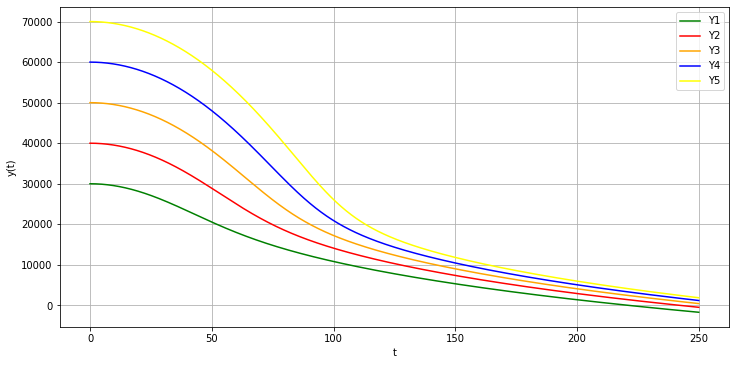

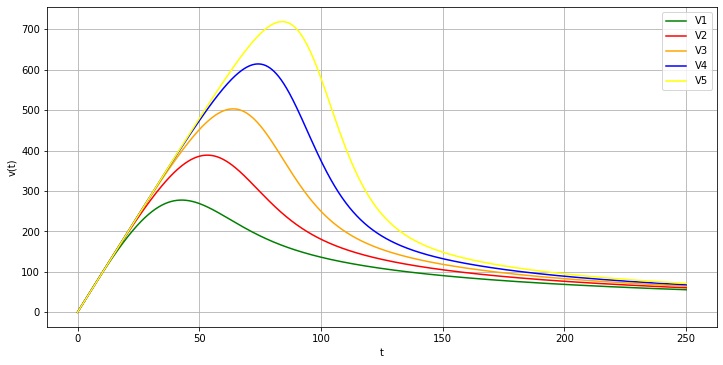

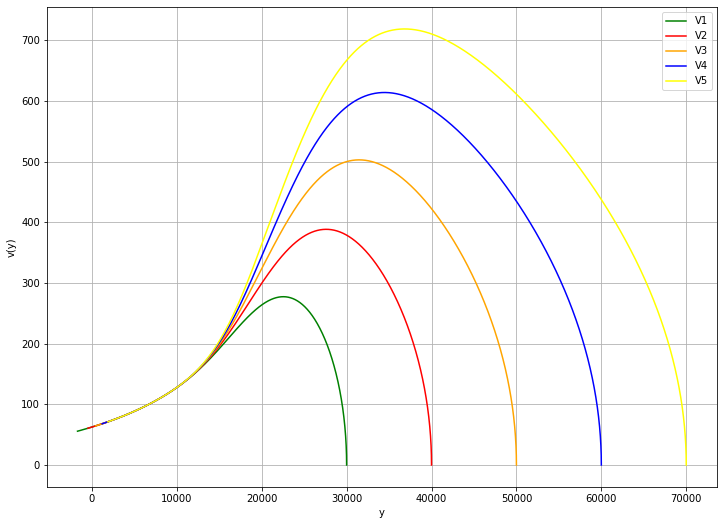

In [18]:
fig1 = plt.figure(figsize=(12,20))                          # grafica de posiciones en funcion del tiempo
plt.subplot(311)
plt.plot(t, y1,color="green", linestyle="-", label="Y1") 
plt.plot(t,y2,color="red" ,linestyle="-", label="Y2") 
plt.plot(t,y3,color="orange",linestyle="-", label="Y3") 
plt.plot(t,y4,color="blue",linestyle="-", label="Y4") 
plt.plot(t,y5,color="yellow",linestyle="-", label="Y5") 
plt.legend()
plt.xlabel("t")    #nombre del eje x
plt.ylabel("y(t)") #nombre del eje y
plt.grid()


fig2 = plt.figure(figsize=(12,20))                           # grafica de velcidades en funcion del tiempo
plt.subplot(312)
plt.plot(t, -v1,color="green", linestyle="-", label="V1") 
plt.plot(t,-v2,color="red", linestyle="-", label="V2") 
plt.plot(t,-v3,color="orange", linestyle="-", label="V3") 
plt.plot(t,-v4,color="blue", linestyle="-", label="V4") 
plt.plot(t,-v5,color="yellow", linestyle="-", label="V5")
plt.legend()
plt.xlabel("t")    #nombre del eje x
plt.ylabel("v(t)") #nombre del eje y
plt.grid()


fig3 = plt.figure(figsize=(12,30))                           # grafica de velocidades en funcion de la posiciones
plt.subplot(313)
plt.plot(y1,-v1,color="green", linestyle="-", label="V1") 
plt.plot(y2,-v2,color="red", linestyle="-", label="V2") 
plt.plot(y3,-v3,color="orange", linestyle="-", label="V3") 
plt.plot(y4,-v4,color="blue", linestyle="-", label="V4") 
plt.plot(y5,-v5,color="yellow", linestyle="-", label="V5")
plt.legend()
plt.xlabel("y")    #nombre del eje x
plt.ylabel("v(y)") #nombre del eje y
plt.grid()